In [1]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from scipy.stats import norm
import matplotlib.pyplot as plt

### read *.CSV data file
fLoc = "../Data/1101/" 

fName0 = "TEK00000.CSV"
fName1 = "TEK00001.CSV"
fName2 = "TEK00002.CSV"
fName3 = "TEK00003.CSV"
fName4 = "TEK00004.CSV"
fName5 = "TEK00005.CSV"
fName6 = "TEK00006.CSV"
fName7 = "TEK00007.CSV"
fName8 = "TEK00008.CSV"
fName9 = "TEK00009.CSV"
fName10 = "TEK00010.CSV"
fName11 = "TEK00011.CSV"
fName12 = "TEK00012.CSV"
fName13 = "TEK00013.CSV"
fName14 = "TEK00014.CSV"
fName15 = "TEK00015.CSV"

# Fabry-perot resonator

No handles with labels found to put in legend.


[-2.8     -2.79992 -2.79984 ... 13.19976 13.19984 13.19992] [0.855 0.865 0.855 ... 0.785 0.785 0.785]


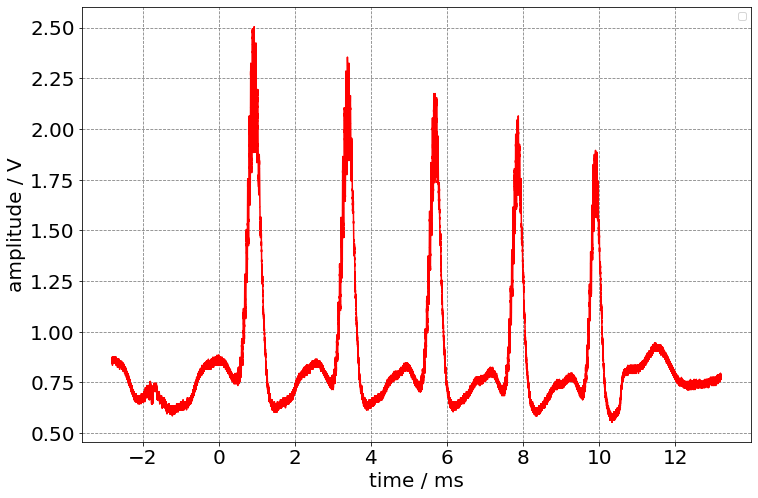

No handles with labels found to put in legend.


200000
200000


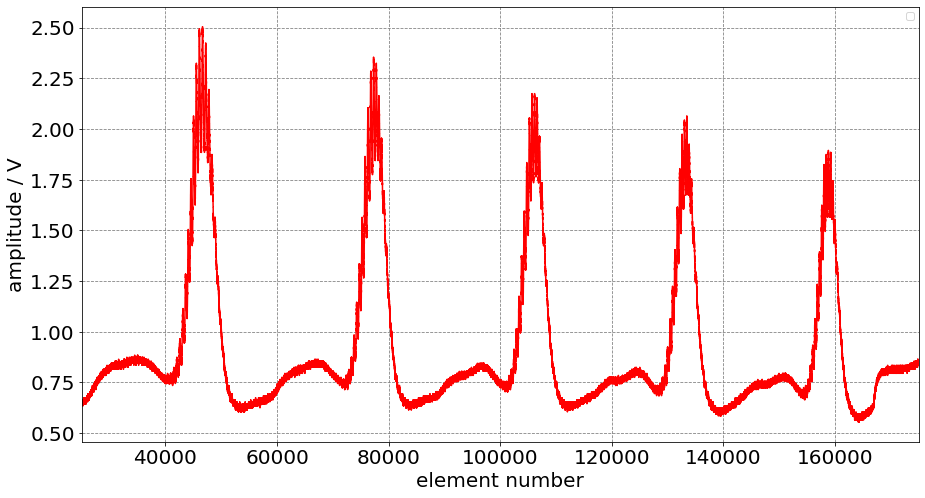

In [2]:
data = np.genfromtxt(fLoc + fName0, skip_header=16 , dtype=float , delimiter=',')

xData = data[:,0]*1000 # in [s]
yData = data[:,1] # in [V]
xElem = np.linspace(0, len(xData)-1, len(xData))

print(xData,yData)

def I(fai, I0, F):
    return I0/(1+(2*F/np.pi)*(np.sin(1.35*fai-1.3))**2)


plt.figure(figsize=(12, 8))
plt.grid(color = "gray", linestyle="--")
plt.legend( ) # add legend
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel('time / ms', fontsize = 20) # x axis label
plt.ylabel('amplitude / V', fontsize = 20) # y axis label

fai = np.linspace(-2,12, 1000)
# plt.plot(fai, I(fai, 2, 1000) +0.5)
plt.plot(xData, yData, color="red")
plt.show()


plt.figure(figsize=(15, 8))
plt.grid(color = "gray", linestyle="--")
plt.legend( ) # add legend
plt.xlim(25000, 175000)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel('element number', fontsize = 20) # x axis label
plt.ylabel('amplitude / V', fontsize = 20) # y axis label

print(len(xElem))
print(len(yData))

plt.plot(xElem, yData, color="red")

plt.show()

# print("Theroretical finess is")
# R = 0.9985
# print(np.pi*R/(1-R**2))

# print("Experimental finess is")
# FSR=2.2
# FWHM = 0.31
# print(FSR/FWHM)

# print("FSR is")
# FSRt = 3*10**8 / (4*1*30*10**-3)
# print(FSRt *10**-9, "GHz")


Note: Offset 0.5 V in fitting function

1st line
        Estimate  Std. Error      lwCI      upCI
center  0.928318    0.000380  0.927573  0.929062
FWHM    0.365055    0.000763  0.363560  0.366550


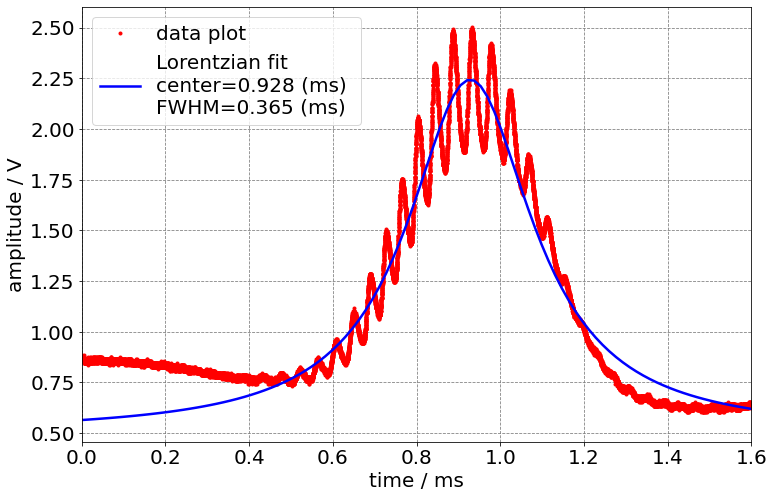

2nd line
        Estimate  Std. Error     lwCI      upCI
center  3.394667    0.000340  3.39400  3.395334
FWHM    0.387484    0.000686  0.38614  0.388828


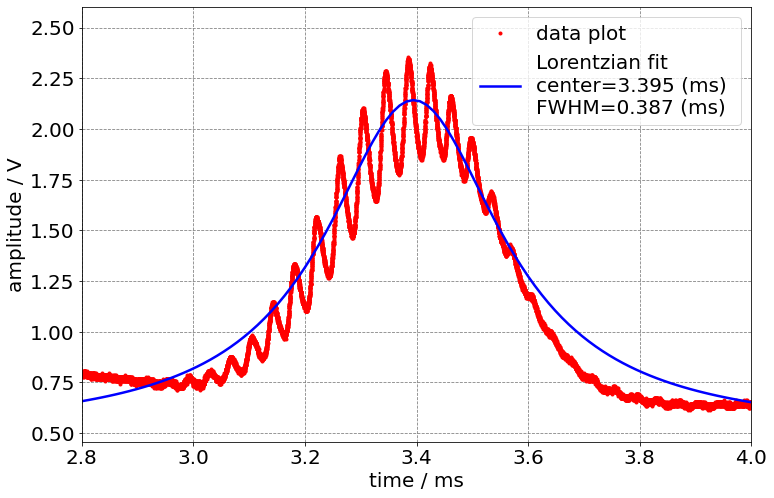

3rd line
        Estimate  Std. Error      lwCI      upCI
center  5.686841    0.000487  5.685887  5.687796
FWHM    0.426790    0.000982  0.424866  0.428715


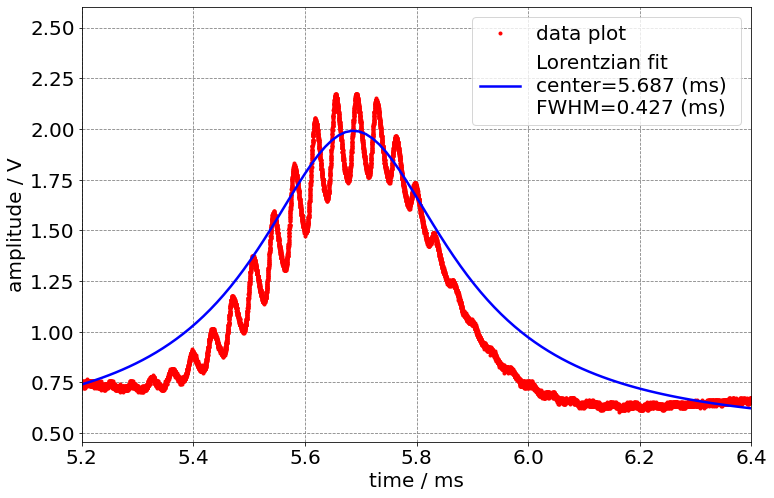

4th line
        Estimate  Std. Error      lwCI      upCI
center  7.852032    0.000773  7.850518  7.853547
FWHM    0.491330    0.001560  0.488273  0.494387


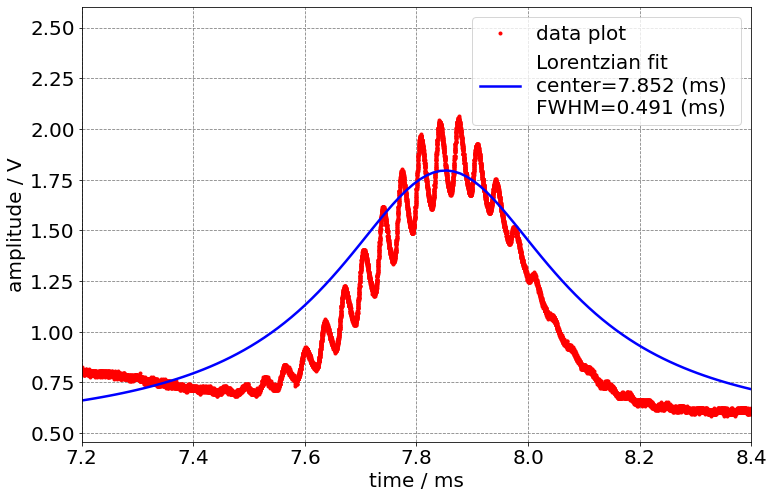

5th line
        Estimate  Std. Error      lwCI      upCI
center  9.894505    0.001133  9.892284  9.896727
FWHM    0.595148    0.002286  0.590667  0.599628


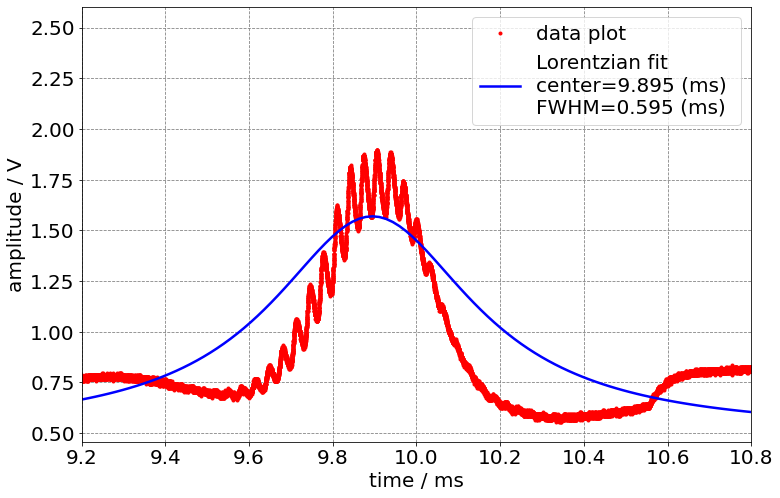

Centers are at
[0.9283178625291492, 3.394666639696087, 5.686841360450733, 7.852032437062644, 9.894505343840624]
FWHM are
[0.3650553278970598, 0.38748390430767155, 0.42679026170111223, 0.4913297567338039, 0.5951476563602273]
FSR are
[2.466348777166938, 2.2921747207546455, 2.1651910766119116, 2.04247290677798]
Finess of each peak are
[6.7560958262809185, 6.140285370593356, 5.221962867194143, 4.281914463476664, 3.431875913398077]
the finess is calculated by (average of both sides of FSR) / FWHM 

Theroretical finess is 1046.4115635424912


In [3]:
data = np.genfromtxt(fLoc + fName0, skip_header=16 , dtype=float , delimiter=',')

xData = data[:,0]*1000 # in [s]
yData = data[:,1] # in [V]

Center = []
FWHM = []

def FitFPR(xDatamin, xDatamax):
    xDataF = xData[xDatamin: xDatamax]
    yDataF = yData[xDatamin: xDatamax]
    
    ### fit data
    def Lorentzian(xDataF, x0, gamma):
        return (gamma/(2*np.pi)) / ((xDataF - x0)**2 + (gamma/2)**2) + 0.5

    # initial fit parameters x0, gamma0
    p0 = (0,1)
    
    # actual fitting
    popt,pcov = curve_fit(Lorentzian, xDataF, yDataF, p0)
    
    StdE = np.sqrt(np.diag(pcov))
    
    Center.append(popt[0])
    FWHM.append(popt[1])

    # estimate 95% confidence interval
    alpha=0.025
    lwCI = popt + norm.ppf(q=alpha)*StdE
    upCI = popt + norm.ppf(q=1-alpha)*StdE

    # print result
    mat = np.vstack((popt,StdE, lwCI, upCI)).T
    df=pd.DataFrame(mat,index=("center", "FWHM"),
    columns=("Estimate", "Std. Error", "lwCI", "upCI"))
    print(df)    
    
    # popt: optimal values for the parameters
    # pcov: estimated covariances of popt

    xFit = np.linspace(np.amin(xDataF), np.amax(xDataF), 100)
    yFit = Lorentzian(xFit, popt[0], popt[1])
    
    plt.figure(figsize=(12, 8))
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.xlim(xData[xDatamin], xData[xDatamax])
    plt.grid(color = "gray", linestyle="--")
    plt.xlabel('time / ms', fontsize = 20) # x axis label
    plt.ylabel('amplitude / V', fontsize = 20) # y axis label
    
    roundcenter = round(popt[0],3)
    roundgamma  = round(popt[1],3)
    plt.plot(xData, yData, ".", color="r",label="data plot")
    plt.plot(xFit, yFit, '-', color = "b",lw = 2.5, label=f"Lorentzian fit \ncenter={roundcenter} (ms) \nFWHM={roundgamma} (ms)")
    plt.legend(fontsize = 20) # add legend
    plt.show( ) # show figure
    

    

print("1st line")
FitFPR(35000, 55000)

print("2nd line")
FitFPR(70000, 85000)

print("3rd line")
FitFPR(100000, 115000)

print("4th line")
FitFPR(125000, 140000)

print("5th line")
FitFPR(150000, 170000)

print("Centers are at")
print(Center)
print("FWHM are")
print(FWHM)

FSR = []
for i in range(0, len(Center)-1):
    FSR.append(Center[i+1]-Center[i])
print("FSR are")
print(FSR)

Finess = []
for i in range(0, len(FWHM)):
    if i == 0 :
        Finess.append(FSR[i]/FWHM[i])
    elif i >= len(FSR):
        Finess.append(FSR[i-1]/FWHM[i])
    else:
        Finess.append(((FSR[i-1]+FSR[i])/2)/FWHM[i])

print("Finess of each peak are")
print(Finess)
print("the finess is calculated by (average of both sides of FSR) / FWHM ")

R = 0.9985
print("\nTheroretical finess is", np.pi*R/(1-R**2))


### plot data
# fig = plt.figure(figsize = (7, 7)) # set figure size
# ax = fig.add_subplot(111) # add subplot to figure
# plot data with error bars in subplot
# ax.errorbar(xData, yData, xerr = 0.2, yerr = 0.01, fmt='bo', ms=4, ecolor='g', capthick =2, label="CH1") # x, y: data
# 'b-': color = 'b', linestyle = '-'
# lw: linewidth
# label: label curve for legend


There is slope in peak intensity and therefore the finess has huge variation.
The fitting with Lorentz function seems to be terrible in 5th line. If y multiplied by 5/4 in 5th line, the fitting and finess become simillar to the 1st line.

5th line
        Estimate  Std. Error      lwCI      upCI
center  9.901218    0.000600  9.900041  9.902394
FWHM    0.396183    0.001206  0.393820  0.398546


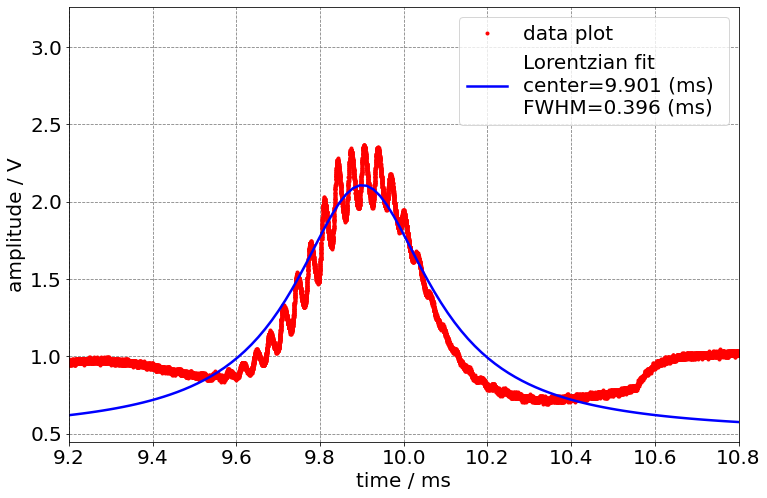

In [4]:
xData = data[:,0]*1000 # in [s]
yData = data[:,1]*5/4 # in [V]

print("5th line")
FitFPR(150000, 170000)

Calibration

5 5
[ 0.015471    0.94706458 -0.89296002] [[ 3.12485396e-08 -3.37775174e-07  5.98383314e-07]
 [-3.37775174e-07  3.87145334e-06 -7.69125934e-06]
 [ 5.98383314e-07 -7.69125934e-06  2.04606668e-05]]
   Estimate  Std. Error      lwCI      upCI
a  0.015471    0.000177  0.015125  0.015817
b  0.947065    0.001968  0.943208  0.950921
c -0.892960    0.004523 -0.901826 -0.884094


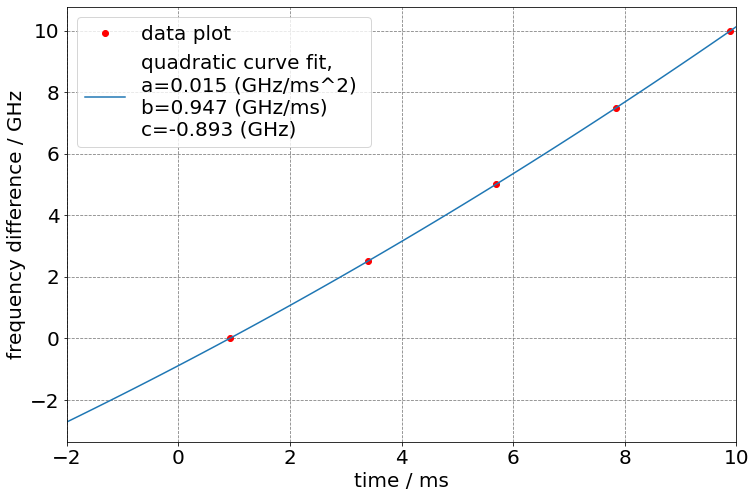

In [5]:
c = 299792458
l = 0.03

myu = np.array([0, 1*c/(4*l), 2*c/(4*l), 3*c/(4*l), 4*c/(4*l)]) * 10**-9
t = np.array(Center[0:5])
print(len(myu), len(t))

def line(x, a, b, c):
    return a*x**2 + b*x +c
p0 = (0,1,1)
poptl,pocvl = curve_fit(line, t, myu, p0)
print(poptl, pocvl)


StdE = np.sqrt(np.diag(pocvl))

# estimate 95% confidence interval
alpha=0.025
lwCI = poptl + norm.ppf(q=alpha)*StdE
upCI = poptl + norm.ppf(q=1-alpha)*StdE

# print result
mat = np.vstack((poptl,StdE, lwCI, upCI)).T
df=pd.DataFrame(mat,index=("a", "b" , "c"),
columns=("Estimate", "Std. Error", "lwCI", "upCI"))
print(df)    



plt.figure(figsize=(12, 8))
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlim(-2, 10)
plt.grid(color = "gray", linestyle="--")
plt.xlabel('time / ms', fontsize = 20) # x axis label
plt.ylabel('frequency difference / GHz', fontsize = 20) # y axis label

plt.plot(t, myu, "o", color="r", label="data plot")


rounda = round(poptl[0],3)
roundb = round(poptl[1],3)
roundc = round(poptl[2],3)

tplot = np.linspace(-2, 10)
plt.plot(tplot, poptl[0]*tplot**2+poptl[1]*tplot + poptl[2], "-", label=f"quadratic curve fit, \na={rounda} (GHz/ms^2) \nb={roundb} (GHz/ms) \nc={roundc} (GHz)")

def calibration(time):
    return poptl[0]*time**2 + poptl[1]*time + poptl[2]

plt.legend(loc=0, fontsize = 20) # add legend
plt.show()

This is a curve fitting with ax^2+bx+c for time-frequency calibration in which the first peak of the FPR signal is set to be 0 GHz and the nth peak as nc0/4l. We can determine frequency difference from the time difference at ant time even though we cannot determine the absolute frequency.

# Absorption

I did plot, subtraction of the slope with line fitting and gaussian fitting to the absorption spectra.

y=ax+b, [a,b]= [-2.06251205 92.12240871] 
variance [[ 2.90468807e-08 -1.84538629e-07]
 [-1.84538629e-07  1.50901138e-06]]
    Estimate  Std. Error       lwCI       upCI
a  -2.062512    0.000170  -2.062846  -2.062178
b  92.122409    0.001228  92.120001  92.124816


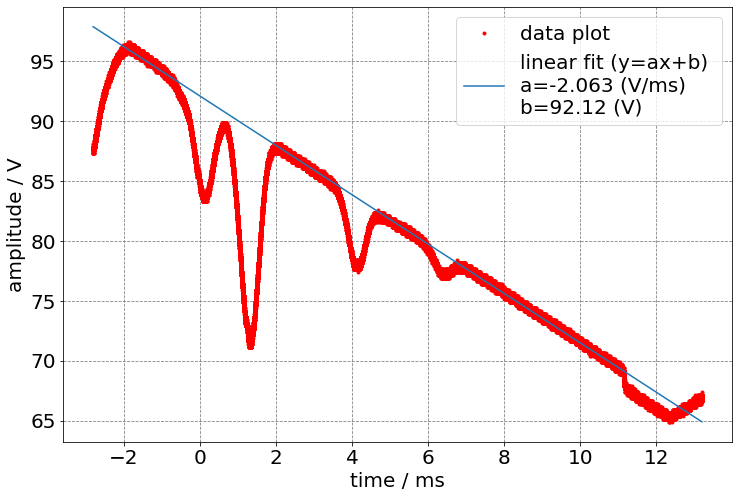

In [24]:
data = np.genfromtxt(fLoc + fName2, skip_header=16 , dtype=float , delimiter=',')

xData = data[:,0]*1000 # in [s]
yData = data[:,1] # in [V]

xDataL = np.append(xData[17000:23000], xData[61000:79000])
xDataL = np.append(xDataL, xData[96000:107000])
xDataL = np.append(xDataL, xData[123000:170000])

yDataL = np.append(yData[17000:23000], yData[61000:79000])
yDataL = np.append(yDataL, yData[96000:107000])
yDataL = np.append(yDataL, yData[123000:170000])

def line(x, a, b):
    return a*x + b

# initial fit parameters x0, gamma0
p0 = (0,1)

# actual fitting
popt,pocv = curve_fit(line, xDataL, yDataL, p0)
print("y=ax+b, [a,b]=", popt, "\nvariance",pocv)

StdE = np.sqrt(np.diag(pocv))

# estimate 95% confidence interval
alpha=0.025
lwCI = popt + norm.ppf(q=alpha)*StdE
upCI = popt + norm.ppf(q=1-alpha)*StdE

# print result
mat = np.vstack((popt,StdE, lwCI, upCI)).T
df=pd.DataFrame(mat,index=("a", "b"),
columns=("Estimate", "Std. Error", "lwCI", "upCI"))
print(df)    

rounda = round(popt[0],3)
roundb = round(popt[1],2)

xFitL = xData
yFitL = popt[0]*xData+popt[1]

plt.figure(figsize=(12, 8))
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.grid(color = "gray", linestyle="--")
plt.xlabel('time / ms',fontsize = 20) # x axis label
plt.ylabel('amplitude / V',fontsize = 20) # y axis label

plt.plot(xData, yData, ".",color="r", label="data plot")
plt.plot(xFitL, yFitL, "-", label=f"linear fit (y=ax+b) \na={rounda} (V/ms) \nb={roundb} (V)")

plt.legend(loc=0, fontsize = 20) # add legend
plt.show( ) # show figure

No handles with labels found to put in legend.


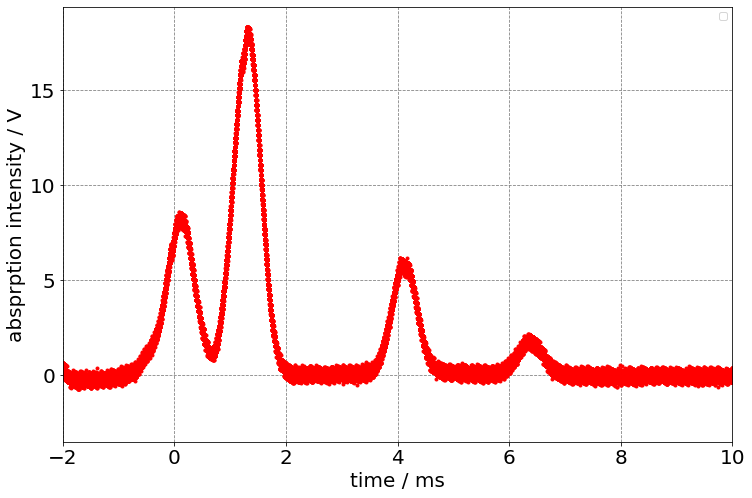

In [7]:
xDataAb = xData
yDataAb = (yData - (popt[0]*xData+popt[1])) * -1

plt.figure(figsize=(12, 8))
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlim(-2,10)
plt.grid(color = "gray", linestyle="--")
plt.legend( ) # add legend
plt.xlabel('time / ms',fontsize = 20) # x axis label
plt.ylabel('absprption intensity / V',fontsize = 20) # y axis label

plt.plot(xDataAb, yDataAb, ".", color="r")
plt.show( ) # show figure

In [8]:
center0 = []

def gausian_Fitting1(xDatamin, xDatamax, parameter_initial, Rb):
    xDataG = np.array(xDataAb[xDatamin: xDatamax])
    yDataG = np.array(yDataAb[xDatamin: xDatamax])

    def gaussian_func(x, A, omega0, FWHM):
        return A * np.exp( - (x - omega0)**2 / (2 * (FWHM/(2*np.sqrt(2*np.log(2))))**2))

    # estimate optimal parameter & parameter covariance
    poptg, pcovg = curve_fit(gaussian_func, xDataG, yDataG, p0=parameter_initial)

    plt.figure(figsize=(12, 8))
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.xlim(xDataAb[xDatamin], xDataAb[xDatamax])
    plt.grid(color = "gray", linestyle="--")
    plt.xlabel('time / ms',fontsize = 20) # x axis label
    plt.ylabel('absorption intensity / V',fontsize = 20) # y axis label

    # plot result
    xd = np.arange(xDataG.min(), xDataG.max(), 0.01)
    estimated_curve = gaussian_func(xd, poptg[0], poptg[1], poptg[2])

    roundcenter = round(poptg[1],3)
    roundgamma  = round(poptg[2],3)
    plt.plot(xDataAb, yDataAb, ".", color="r",label="data plot")
    plt.plot(xd, estimated_curve, "-", color="b", label=f"Gaussian fit \ncenter={roundcenter} (ms) \nFWHM={roundgamma} (ms)")
    plt.legend(loc=1, fontsize = 20) # add legen

    plt.show( ) # show figure

    StdE = np.sqrt(np.diag(pcovg))

    # estimate 95% confidence interval
    alpha=0.025
    lwCI = poptg + norm.ppf(q=alpha)*StdE
    upCI = poptg + norm.ppf(q=1-alpha)*StdE

    # print result
    mat = np.vstack((poptg,StdE, lwCI, upCI)).T
    df=pd.DataFrame(mat,index=("A", "omega0", "FWHM"),
    columns=("Estimate", "Std. Error", "lwCI", "upCI"))
    print(df)
    center0.append(poptg[1])
    
    
    
    deltaomega = calibration(poptg[1]+poptg[2]/2) - calibration(poptg[1]-poptg[2]/2)
    print("\n The Frequency FWHM (delta omega) is ",  deltaomega, "GHz")

    kb = 1.380649*10**-23
    c0 = 299792458
    if Rb==85:
        m = 84.91*1.66053906660*10**(-27) 
    if Rb==87:
        m = 86.91*1.66053906660*10**(-27) 
    omega = c0 / (780.24 * 10**-9) 
    Temp = ((deltaomega*(10**9) *c0/omega)**2)*m/(8*kb*np.log(2))
    print("The temperature of 85Rb or 87Rb is ", Temp, "K")

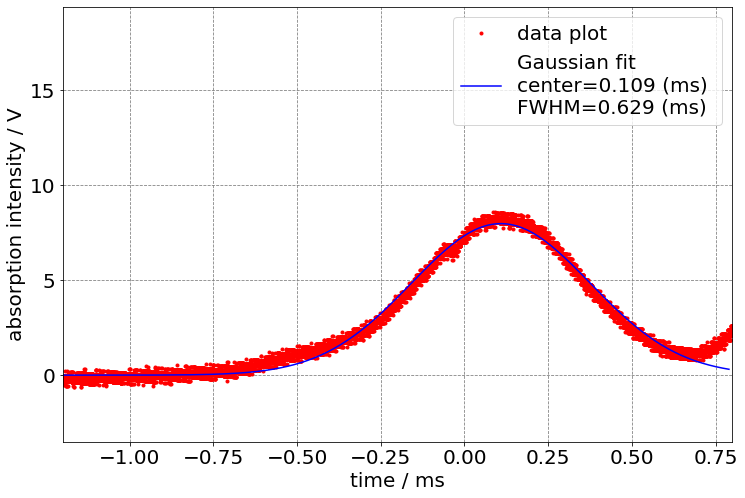

        Estimate  Std. Error      lwCI      upCI
A       7.970202    0.006266  7.957921  7.982482
omega0  0.108610    0.000242  0.108135  0.109085
FWHM    0.629287    0.000574  0.628162  0.630412

 The Frequency FWHM (delta omega) is  0.5980905221180484 GHz
The temperature of 85Rb or 87Rb is  410.49737054615287 K

 lwCI is lower limit of 95% confidence interval, upCI is upper limit


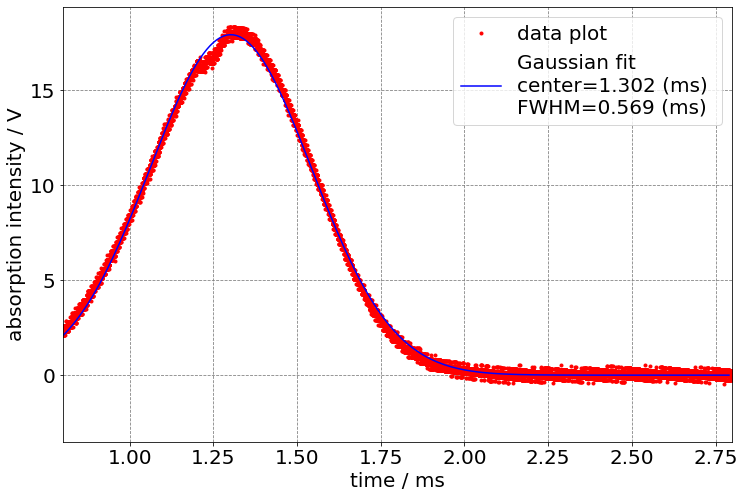

         Estimate  Std. Error       lwCI       upCI
A       17.907174    0.004286  17.898774  17.915574
omega0   1.302175    0.000067   1.302044   1.302306
FWHM     0.568939    0.000162   0.568620   0.569257

 The Frequency FWHM (delta omega) is  0.5617451333797754 GHz
The temperature of 85Rb or 87Rb is  353.78895244369215 K


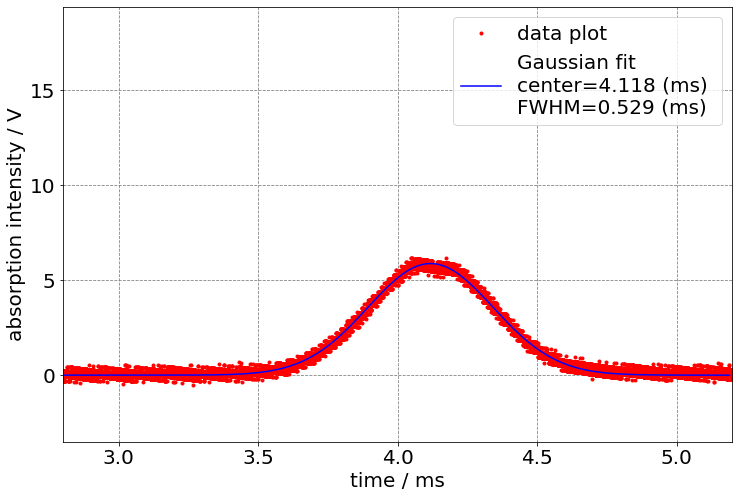

        Estimate  Std. Error      lwCI      upCI
A       5.870415    0.002919  5.864694  5.876137
omega0  4.118395    0.000129  4.118142  4.118648
FWHM    0.529273    0.000304  0.528678  0.529869

 The Frequency FWHM (delta omega) is  0.5687020456851766 GHz
The temperature of 85Rb or 87Rb is  362.60618779928683 K


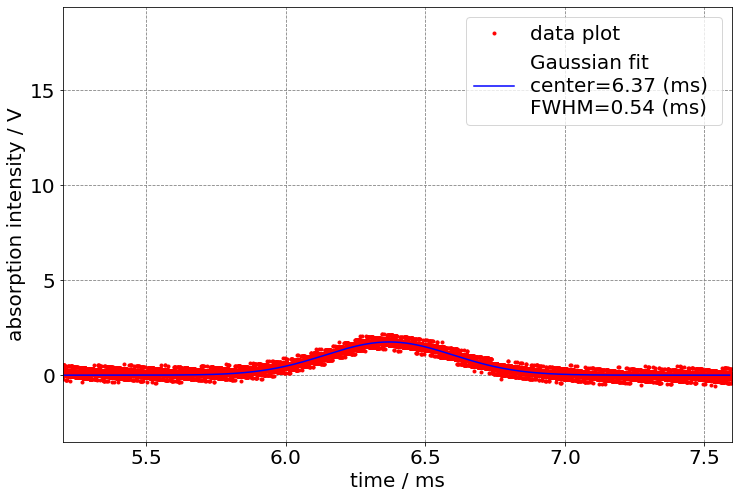

        Estimate  Std. Error      lwCI      upCI
A       1.745341    0.002668  1.740112  1.750569
omega0  6.370184    0.000405  6.369391  6.370977
FWHM    0.539754    0.000953  0.537887  0.541621

 The Frequency FWHM (delta omega) is  0.6175707437910596 GHz
The temperature of 85Rb or 87Rb is  437.673212793826 K


In [9]:
gausian_Fitting1(20000, 45000, np.array([50, 0, 0.5]), 87)
print("\n lwCI is lower limit of 95% confidence interval, upCI is upper limit")

gausian_Fitting1(45000, 70000, np.array([50, 1.5, 0.5]), 85)
gausian_Fitting1(70000, 100000, np.array([50, 4.1, 0.5]), 85)
gausian_Fitting1(100000, 130000, np.array([50, 6.5, 0.5]), 87)

In [10]:
print("1st to 2nd")
print(calibration(center0[1])-calibration(center0[0]), "GHz")

print("\n2nd to 3rd")
print(calibration(center0[2])-calibration(center0[1]), "GHz")

print("\n3rd to 4th")
print(calibration(center0[3])-calibration(center0[2]), "GHz")

print(center0)


print(calibration(2), calibration(4), calibration(2) - calibration(4))

1st to 2nd
1.1564338143324953 GHz

2nd to 3rd
2.903315171002337 GHz

3rd to 4th
2.497985003289342 GHz
[0.10860999771803674, 1.3021746268040921, 4.118394833816466, 6.37018416316726]
1.0630531198007664 3.142834238061255 -2.079781118260488


gaussian fitting of each peak and their central wavelength and spectral width

# Saturated Absorption

I did plot, subtraction of the slope by line fitting, gaussian fitting to the absorption spectra and subtraction of background gaussian spectra.

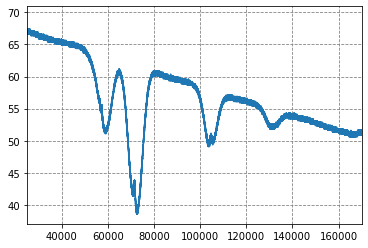

No handles with labels found to put in legend.


y=ax+b, [a,b]= [-1.42844373 68.46233034] 
variance [[ 3.27878926e-08 -2.13906898e-07]
 [-2.13906898e-07  1.85188558e-06]]
    Estimate  Std. Error       lwCI       upCI
a  -1.428444    0.000181  -1.428799  -1.428089
b  68.462330    0.001361  68.459663  68.464998


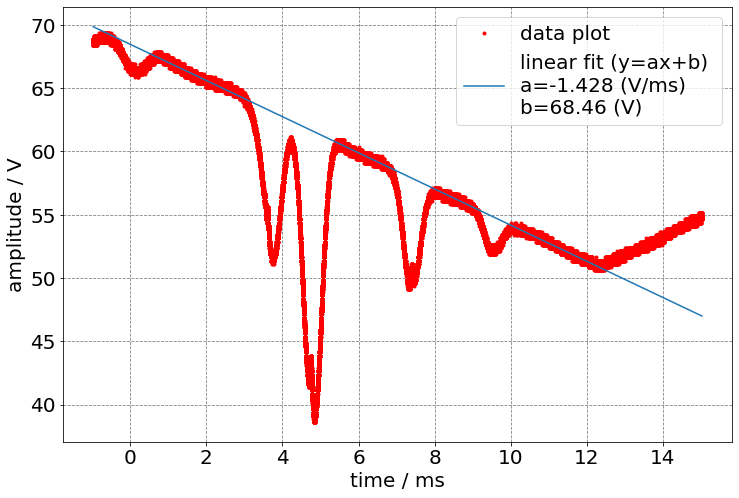

In [26]:
data = np.genfromtxt(fLoc + fName15, skip_header=16 , dtype=float , delimiter=',')

xData = data[:,0]*1000 # in [s]
yData = data[:,1] # in [V]

xElem = np.linspace(0, len(xData)-1, len(xData))
plt.grid(color = "gray", linestyle="--")
plt.xlim(25000,170000)
plt.plot(xElem, yData)
plt.show()

xDataL = np.append(xData[25000:48000], xData[81000:95000])
xDataL = np.append(xDataL, xData[113000:124000])
xDataL = np.append(xDataL, xData[140000:160000])

yDataL = np.append(yData[25000:48000], yData[81000:95000])
yDataL = np.append(yDataL, yData[113000:124000])
yDataL = np.append(yDataL, yData[140000:160000])

def line(x, a, b):
    return a*x + b

# initial fit parameters x0, gamma0
p0 = (0,1)

# actual fitting
popt,pocv = curve_fit(line, xDataL, yDataL, p0)
print("y=ax+b, [a,b]=", popt, "\nvariance", pocv)
      
StdE = np.sqrt(np.diag(pocv))

# estimate 95% confidence interval
alpha=0.025
lwCI = popt + norm.ppf(q=alpha)*StdE
upCI = popt + norm.ppf(q=1-alpha)*StdE

# print result
mat = np.vstack((popt,StdE, lwCI, upCI)).T
df=pd.DataFrame(mat,index=("a", "b"),
columns=("Estimate", "Std. Error", "lwCI", "upCI"))
print(df)    

rounda = round(popt[0],3)
roundb = round(popt[1],2)

xFitL = xData
yFitL = popt[0]*xData+popt[1]

plt.figure(figsize=(12, 8))
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
# plt.xlim(9,10)
plt.grid(color = "gray", linestyle="--")
plt.legend( ) # add legend
plt.xlabel('time / ms',fontsize = 20) # x axis label
plt.ylabel('amplitude / V',fontsize = 20) # y axis label

plt.plot(xData, yData, ".", color="r", label="data plot")
plt.plot(xFitL, yFitL, "-", label=f"linear fit (y=ax+b) \na={rounda} (V/ms) \nb={roundb} (V)")

plt.legend(loc=0, fontsize = 20) # add legend
plt.show( ) # show figure


No handles with labels found to put in legend.


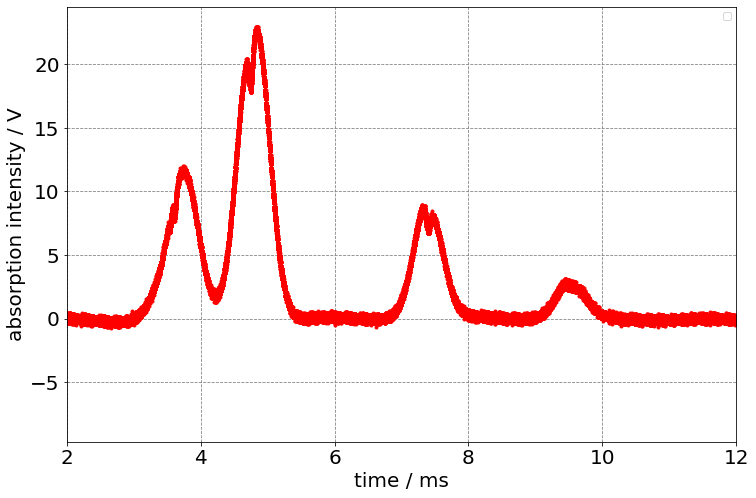

In [12]:
xDataAb = xData
yDataAb = (yData - (popt[0]*xData+popt[1])) * -1

plt.figure(figsize=(12, 8))
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlim(2, 12)
plt.grid(color = "gray", linestyle="--")
plt.legend( ) # add legend
plt.xlabel('time / ms', fontsize = 20) # x axis label
plt.ylabel('absorption intensity / V', fontsize = 20) # y axis label

plt.plot(xDataAb, yDataAb, ".", color="r")
plt.show( ) # show figure

In [13]:
def gausian_Fitting2(xDatamin, xDatamax, xDataminD, xDatamaxD, parameter_initialG, parameter_initialD):
    xDataG = np.array(xDataAb[xDatamin: xDatamax])
    yDataG = np.array(yDataAb[xDatamin: xDatamax])

    def gaussian_func(x, A, omega0, FWHM):
        return A * np.exp( - (x - omega0)**2 / (2 * (FWHM/(2*np.sqrt(2*np.log(2))))**2))

    # estimate optimal parameter & parameter covariance
    poptg, pcovg = curve_fit(gaussian_func, xDataG, yDataG, p0=parameter_initialG)

    plt.figure(figsize=(12, 8))
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.xlim(xDataAb[xDatamin], xDataAb[xDatamax])
    plt.grid(color = "gray", linestyle="--")

    plt.xlabel('time / ms',fontsize = 20) # x axis label
    plt.ylabel('absorption intensity / V',fontsize = 20) # y axis label

    roundcenter = round(poptg[1],3)
    roundgamma  = round(poptg[2],3)
    
    # plot result
    xd = np.arange(xDataG.min(), xDataG.max(), 0.01)
    estimated_curve = gaussian_func(xd, poptg[0], poptg[1], poptg[2])

    plt.plot(xDataAb, yDataAb, "-", color="r", label="data plot")
    plt.plot(xd, estimated_curve,"-", color="b", label=f"Gaussian fit \ncenter={roundcenter} (ms) \nFWHM={roundgamma} (ms)")
    
    plt.legend(fontsize = 20 ) # add legend
    plt.show( ) # show figure

    StdE = np.sqrt(np.diag(pcovg))
    
    # estimate 95% confidence interval
    alpha=0.025
    lwCI = poptg + norm.ppf(q=alpha)*StdE
    upCI = poptg + norm.ppf(q=1-alpha)*StdE
    

    # print result
    mat = np.vstack((poptg,StdE, lwCI, upCI)).T
    df=pd.DataFrame(mat,index=("A", "omega0", "FWHM"),
    columns=("Estimate", "Std. Error", "lwCI", "upCI"))
    print(df)
    
    
    
    
    
    xDataD = np.array(xDataAb[xDataminD: xDatamaxD])
    yDataD = (yDataAb[xDataminD: xDatamaxD] - gaussian_func(xDataD, poptg[0], poptg[1], poptg[2]))*(-1)
    
    def Lorentzian(xDataD, x0, gamma):
        return (gamma/(2*np.pi)) / ((xDataD - x0)**2 + (gamma/2)**2)
    
    # actual fitting
    popt,pcov = curve_fit(Lorentzian, xDataD, yDataD, parameter_initialD)
    
    StdE = np.sqrt(np.diag(pcov))
    
    lwCI = [0,0]
    upCI = [0,0]
    
    # estimate 95% confidence interval
    alpha=0.025
    lwCI = popt + norm.ppf(q=alpha)*StdE
    upCI = popt + norm.ppf(q=1-alpha)*StdE

    # print result
    mat = np.vstack((popt,StdE, lwCI, upCI)).T
    df=pd.DataFrame(mat,index=("x0", "gamma"),
    columns=("Estimate", "Std. Error", "lwCI", "upCI"))
#     print(df)


    
    plt.figure(figsize=(12, 8))
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.xlim(xDataAb[xDataminD], xDataAb[xDatamaxD])
    plt.grid(color = "gray", linestyle="--")

    plt.xlabel('time / ms', fontsize = 20) # x axis label
    plt.ylabel('intensity / V', fontsize = 20) # y axis label

    plt.plot(xDataD, yDataD, ".", color="r")
    
    xd = np.arange(xDataD.min(), xDataD.max(), 0.01)
    estimated_curve = Lorentzian(xd, popt[0], popt[1])
#     plt.plot(xd, estimated_curve, color="r")
#     plt.legend( ) # add legend
    plt.show( ) # show figure
    

Gaussian fitting and subtracted peak.

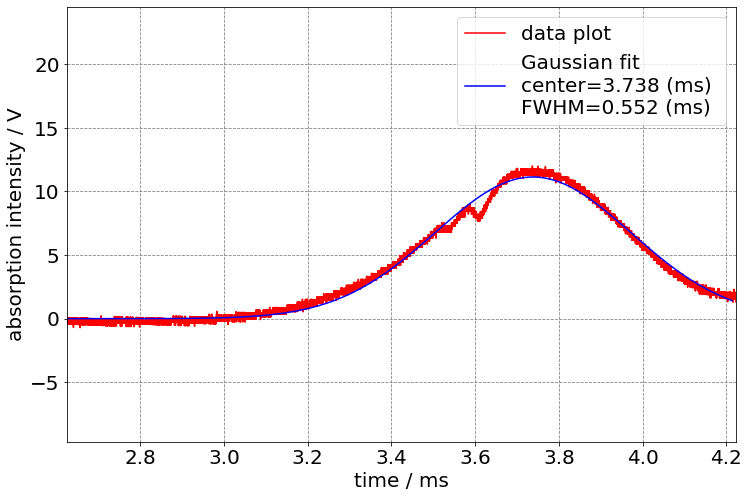

         Estimate  Std. Error       lwCI       upCI
A       11.134574    0.006301  11.122224  11.146925
omega0   3.738255    0.000153   3.737955   3.738556
FWHM     0.551591    0.000372   0.550861   0.552320


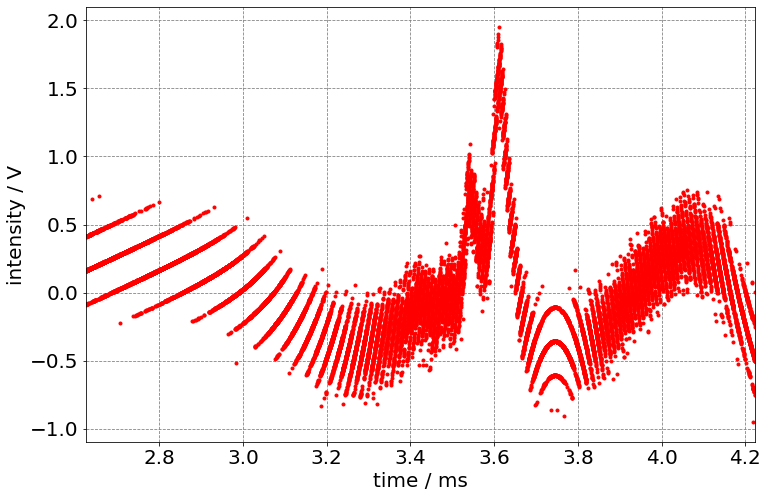

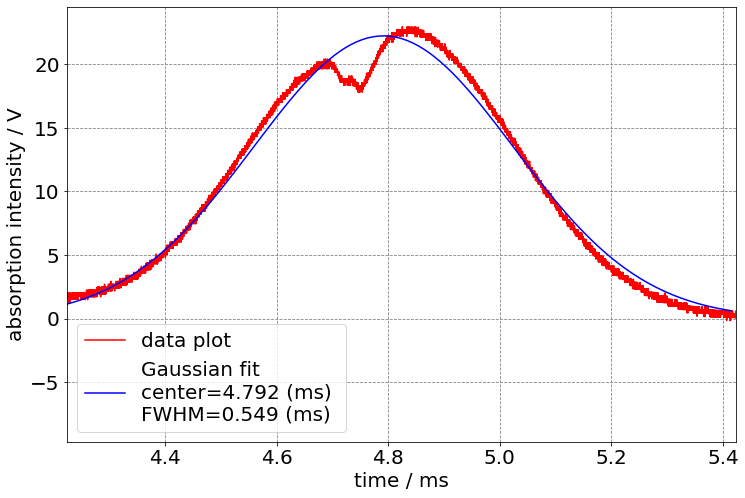

         Estimate  Std. Error       lwCI       upCI
A       22.222700    0.016551  22.190261  22.255140
omega0   4.791719    0.000200   4.791327   4.792111
FWHM     0.548615    0.000478   0.547679   0.549551


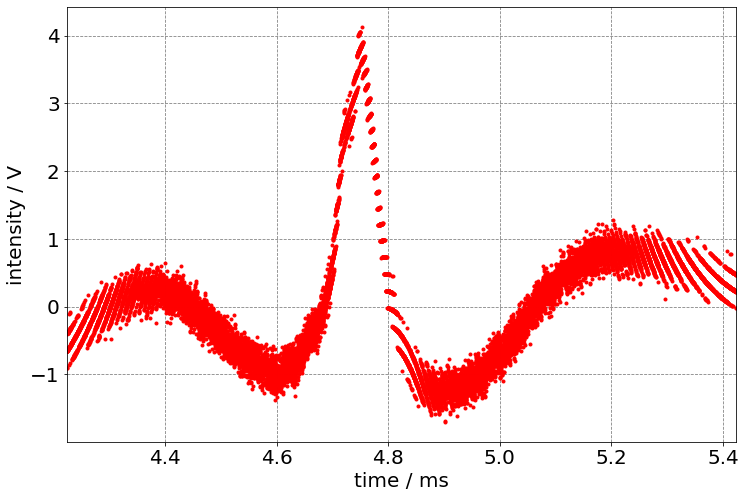

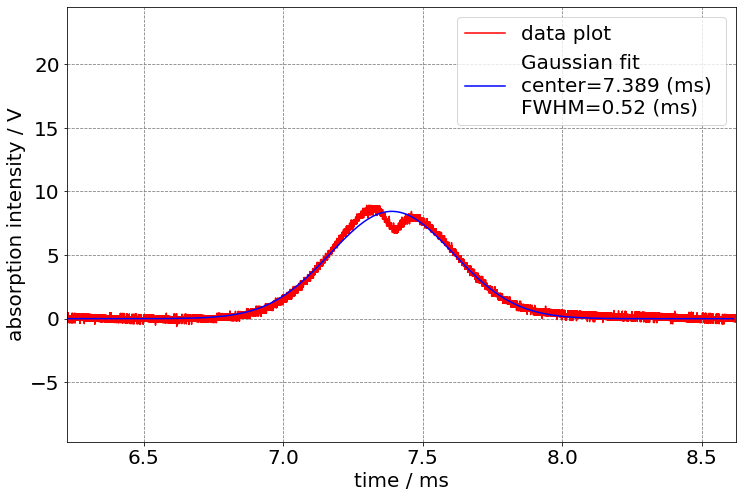

        Estimate  Std. Error      lwCI      upCI
A       8.432681    0.005361  8.422174  8.443187
omega0  7.389311    0.000162  7.388993  7.389629
FWHM    0.519949    0.000382  0.519201  0.520698


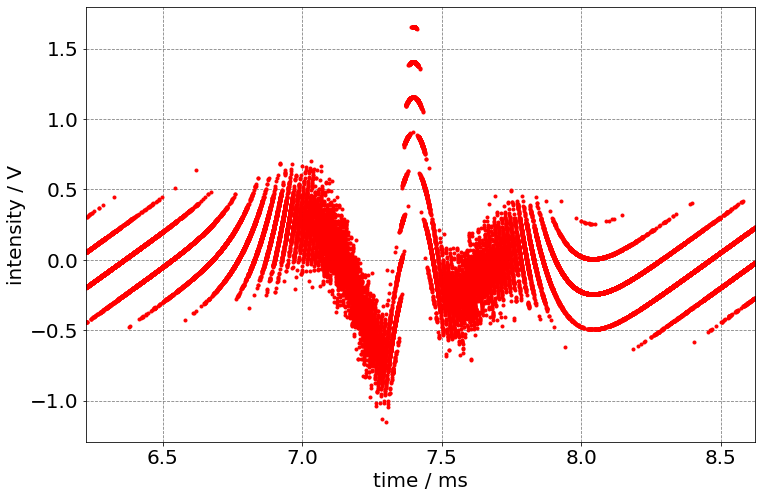

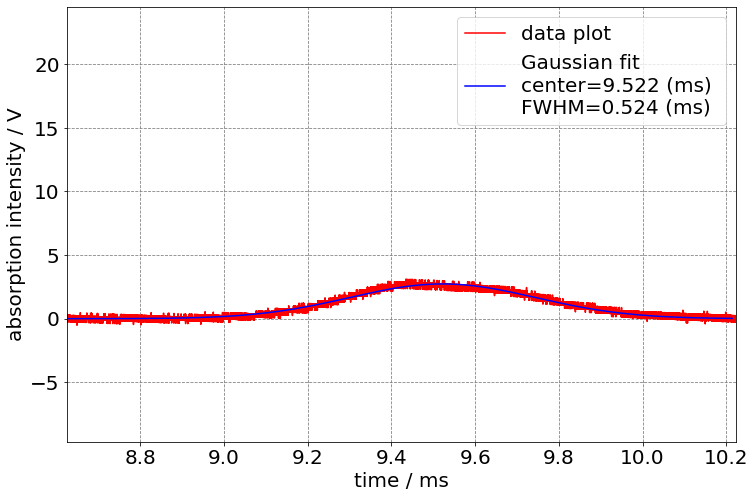

        Estimate  Std. Error      lwCI      upCI
A       2.730220    0.002991  2.724358  2.736081
omega0  9.522261    0.000282  9.521709  9.522813
FWHM    0.524456    0.000664  0.523156  0.525757


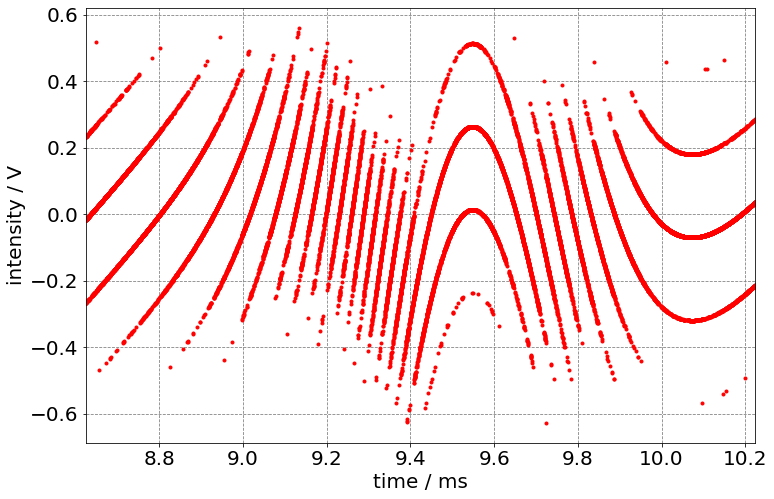

In [14]:
gausian_Fitting2(45000, 65000, 45000, 65000, np.array([50, 3.6, 0.5]), np.array([3.6,0.2]))
gausian_Fitting2(65000, 80000, 65000, 80000, np.array([50, 5, 0.5]), np.array([4.8,0.2]))
gausian_Fitting2(90000, 120000, 90000, 120000, np.array([50, 7.5, 0.5]), np.array([7.5,0.2]))
gausian_Fitting2(120000, 140000, 120000, 140000, np.array([50, 9.5, 0.5]), np.array([9.5,0.2]))

In [15]:

print("1-1 to 1-2 (two peaks difference at the 1st spectra)")
print(calibration(3.62)-calibration(3.54), "GHz")

print("\n1-2 to 2-1")
print(-calibration(3.54)+calibration(4.72), "GHz")

print("\n2-1 to 2-2")
print(-calibration(4.72)+calibration(4.75), "GHz")

print("\n2-2 to 3")
print(-calibration(4.74)+calibration(7.38), "GHz")

print("\n3 to 4")
print(-calibration(7.38)+calibration(9.54), "GHz")



print(center0)


1-1 to 1-2 (two peaks difference at the 1st spectra)
0.08462695325274083 GHz

1-2 to 2-1
1.2683289145940266 GHz

2-1 to 2-2
0.03280724756241682 GHz

2-2 to 3
2.9952728805590922 GHz

3 to 4
2.6110811083431598 GHz
[0.10860999771803674, 1.3021746268040921, 4.118394833816466, 6.37018416316726]


I read the peak value manually without fitting because it is impossoble to do Lorentzian fitting.

In [16]:
np.log(10)

2.302585092994046

No handles with labels found to put in legend.


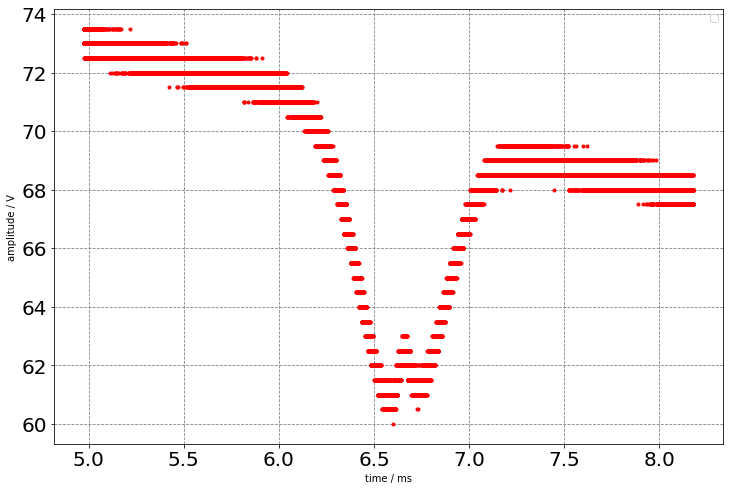

In [17]:
data = np.genfromtxt(fLoc + fName14, skip_header=16 , dtype=float , delimiter=',')

xData = data[:,0]*1000 # in [s]
yData = data[:,1] # in [V]

plt.figure(figsize=(12, 8))

plt.plot(xData, yData, ".", color="r", label="")
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.grid(color = "gray", linestyle="--")
plt.legend( ) # add legend
plt.xlabel('time / ms') # x axis label
plt.ylabel('amplitude / V') # y axis label
plt.show( ) # show figure

[1 2 3 4 5] [  1   4   6   5 -10]
[-2.1  7.5] [[  4.22333336 -12.67000007]
 [-12.67000007  46.45666688]]


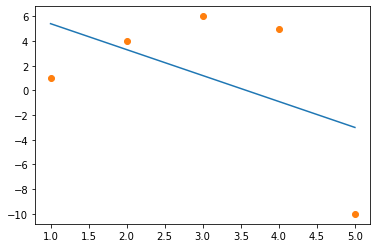

In [18]:
x = np.array([1,2,3,4,5])
y = np.array([1,4,6,5,-10])
print(x,y)
# a = lsq_linear(x,y)
# print(a)

def line(x, a, b):
    return a*x + b

# initial fit parameters x0, gamma0
p0 = (0,1)

# actual fitting curve_fir(function I want to fit with, x(experimental data,list or array), y(experimental data), initial condition)
# popt（curve_fitで出てくる一つ目の要素）は最適なaとbの値、リスト形式 （関数によって最適化するパラメーターが増えたりする）
# ここではaがpopt[0]に入っていて、bがpopt[1]に入っている
# pocv（curve_fitで出てくる二つ目の要素）は差を最小にしたときに求まる共分散、行列形式
popt,pocv = curve_fit(line, x, y, p0) #定義したline関数で(x,y)のデータ点をp0からフィッティングして、line関数の形を決める係数パラメーターの最適値a,bとその時の分散を代入する

print(popt, pocv)

plt.plot(x, popt[0]*x+popt[1]) #popt[0]*x+popt[1]でフィッティングした結果の関数のｙを計算してプロットする
plt.plot(x,y, "o")


In [19]:
np.append(x,3)

array([1, 2, 3, 4, 5, 3])

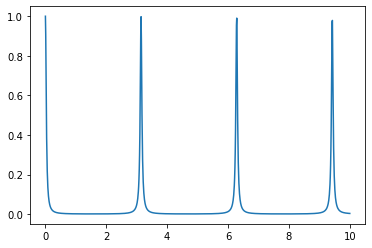

In [20]:
def I(fai, I0, F):
    return I0/(1+F*(np.sin(fai))**2)

fai = np.linspace(0,10, 1000)
plt.plot(fai, I(fai, 1, 1000))

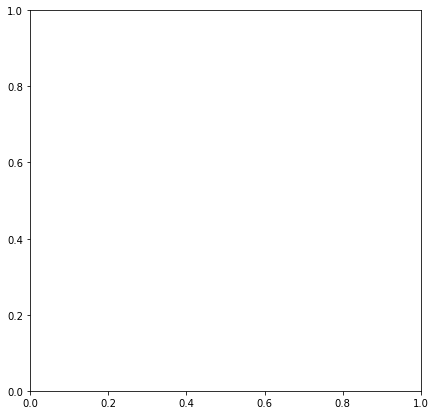

In [21]:
### fit data
def Lorentzian(xData, x0, gamma):
    return 1/(np.pi*gamma)*gamma**2/((xData - x0)**2 + gamma**2)

# initial fit parameters x0, gamma0
p0 = (0,1)

# actual fitting
popt,pcov = curve_fit(Lorentzian, xData, yData, p0)

# popt: optimal values for the parameters
# pcov: estimated covariances of popt

xFit = np.linspace(np.amin(xData), np.amax(xData), 100)
yFit = Lorentzian(xFit, popt[0], popt[1])

### plot data
fig = plt.figure(figsize = (7, 7)) # set figure size
ax = fig.add_subplot(111) # add subplot to figure
# plot data with error bars in subplot
# ax.errorbar(xData, yData, xerr = 0.2, yerr = 0.01, fmt='bo', ms=4, ecolor='g', capthick =2, label="CH1") # x, y: data
# 'b-': color = 'b', linestyle = '-'
# lw: linewidth
# label: label curve for legend
# ax.plot(xFit, yFit, 'r--', lw = 2.5, label="best fit")

In [22]:
name = "aaa"
name1 = "fjof"
print(f"poppop{name}, mame{name1}")

poppopaaa, mamefjof
